## Operational Layer

### Importing SQL libraries and creation sqlite engine

In [2]:
## Import the SQL library and create an engine for python:
import sqlite3
import pandas as pd
!pip install -q ipython-sql
%load_ext sql
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo = False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.1 MB/s eta 0:00:00


### Creation of Supermarket_olist SQLite database

In [3]:
# Connect to an SQLite database named "Supermarket_olist" (this will create a new database file if it doesn't exist)
conn = sqlite3.connect('Supermarket_olist.db')

### Creation and load of table customers

In [4]:
# Dataset 1: Customers (olist_customers_dataset.csv)
url_customers = 'https://raw.githubusercontent.com/Alejandra-savagebriz/Term-Project-1/main/Datasets/customers_olist.csv'
customers = pd.read_csv(url_customers)

# Define the table creation query for Customers
customers_table = '''
CREATE TABLE IF NOT EXISTS customers (
  customer_id VARCHAR(50) PRIMARY KEY,
  customer_unique_id VARCHAR(50),
  customer_zip_code_prefix INT NOT NULL,
  customer_city VARCHAR(50),
  customer_state VARCHAR(45)
);
'''
# Execute the table creation query
conn.execute(customers_table)
# Write the DataFrame to the SQLite database
customers.to_sql('customers', con=conn, if_exists='replace', index=False)

# Query the data to verify it's loaded
result = pd.read_sql_query('SELECT * FROM customers LIMIT 5', conn)
print(result)

                        customer_id                customer_unique_id  \
0  9ef432eb6251297304e76186b10a928d  7c396fd4830fd04220f754e42b4e5bff   
1  2a3caad976ff659d519660a7c9357122  0b7a92bbb834394fd894c370ba568278   
2  00daf19c19d0fa15a86284fa7293b5ac  5f9d0a2d1cbdc542a46b46a8b3511701   
3  23549dc8454087a9e2266d05c5de7602  6a9d8ebad6be7bdae3088a5416e7fe99   
4  68420570763989d8da614b8da4c5c102  06fc096ec2387d11747ae31a57cd2551   

   customer_zip_code_prefix        customer_city customer_state  
0                      3149            sao paulo             SP  
1                     88960              sombrio             SC  
2                     12243  sao jose dos campos             SP  
3                     65077             sao luis             MA  
4                     29101           vila velha             ES  


### Creation and load of table payments

In [5]:
# Dataset 2: Payments (olist_order_payments_dataset.csv)
url_payments = 'https://raw.githubusercontent.com/Alejandra-savagebriz/Term-Project-1/main/Datasets/payments_olist.csv'
payments = pd.read_csv(url_payments)

# Define the table creation query for Payments
payments_table = '''
CREATE TABLE IF NOT EXISTS payments (
  order_id VARCHAR(100) NOT NULL PRIMARY KEY,
  payment_sequential INT,
  payment_type VARCHAR(45),
  payment_installments INT,
  payment_value VARCHAR(45)
);
'''
# Execute the table creation query
conn.execute(payments_table)
# Write the DataFrame to the SQLite database
payments.to_sql('payments', con=conn, if_exists='replace', index=False)

# Query the data to verify it's loaded
result = pd.read_sql_query('SELECT * FROM payments', conn)
print(result)

                              order_id  payment_sequential payment_type  \
0     e481f51cbdc54678b7cc49136f2d6af7                   1  credit_card   
1     a60241fca336b3f14485dff30a172cab                   1  credit_card   
2     cef3c3045c93eee043b5f3df78466d5b                   1  credit_card   
3     aab7b04f45546e03e7c86b9e8f12368e                   1       boleto   
4     f64dd636875aef9058782fc05a867ec1                   1  credit_card   
...                                ...                 ...          ...   
3009  fa612a1874826daa30fed5e3073b9d0d                   1  credit_card   
3010  796033ffde6ba06e0abe387e36ee8fe0                   1  credit_card   
3011  30d7af26cb5f8577b5c6a0164dc814c5                   1  credit_card   
3012  80850824446cd379f755548b967c61b9                   1       boleto   
3013  9ea64f21920bb6b6972cadb024eabee6                   1       boleto   

      payment_installments  payment_value  
0                        1          18.12  
1          

### Creation and load of table reviews

In [6]:
# Dataset 3: Reviews (olist_order_reviews_dataset.csv)
url_reviews = 'https://raw.githubusercontent.com/Alejandra-savagebriz/Term-Project-1/main/Datasets/reviews_olist.csv'
reviews = pd.read_csv(url_reviews)

# Define the table creation query for Reviews
reviews_table = '''
CREATE TABLE IF NOT EXISTS reviews (
  order_id VARCHAR(100) NOT NULL PRIMARY KEY,
  review_id VARCHAR(45) NOT NULL,
  review_score INT NOT NULL,
  review_comment_title VARCHAR(200) NULL,
  review_comment_message VARCHAR(300) NULL,
  review_creation_date VARCHAR(45) NOT NULL,
  review_answer_timestamp VARCHAR(45) NOT NULL
);
'''
# Execute the table creation query
conn.execute(reviews_table)

# Write the DataFrame to the SQLite database
reviews.to_sql('reviews', con=conn, if_exists='replace', index=False)

# Query the data to verify it's loaded
result = pd.read_sql_query('SELECT * FROM reviews LIMIT 5', conn)
print(result)

                          review_id                          order_id  \
0  a54f0611adc9ed256b57ede6b6eb5114  e481f51cbdc54678b7cc49136f2d6af7   
1  abf7167b43e3978411cfaa0f77e5d21b  a60241fca336b3f14485dff30a172cab   
2  a558aacd477a8e5eca4d9a474a3ffa2c  cef3c3045c93eee043b5f3df78466d5b   
3  a19b59849b297b963661b494f4e56223  aab7b04f45546e03e7c86b9e8f12368e   
4  574b50d33e9b363d87967377b63112c7  f64dd636875aef9058782fc05a867ec1   

   review_score review_creation_date review_answer_timestamp  
0             4        11-10-17 0:00           12-10-17 3:43  
1             3        03-08-18 0:00          03-08-18 21:50  
2             3        20-06-18 0:00          21-06-18 19:41  
3             1        28-03-18 0:00          31-03-18 12:59  
4             5        08-11-17 0:00          08-11-17 21:07  


### Creation and load of table orders

In [7]:
# Dataset 4: Orders (olist_orders_dataset.csv)
url_orders = 'https://raw.githubusercontent.com/Alejandra-savagebriz/Term-Project-1/main/Datasets/orders_olist.csv'
orders = pd.read_csv(url_orders)

# Define the table creation query for Orders
orders_table = '''
CREATE TABLE IF NOT EXISTS orders (
  order_id VARCHAR(100) NOT NULL PRIMARY KEY,
  customer_id VARCHAR(45) NOT NULL,
  order_status VARCHAR(45) NOT NULL,
  order_purchase_timestamp VARCHAR(45) NOT NULL,
  order_approved_at VARCHAR(45) NOT NULL,
  order_delivered_carrier_date VARCHAR(45) NOT NULL,
  order_delivered_customer_date VARCHAR(45) NOT NULL,
  order_estimated_delivery_date VARCHAR(45) NOT NULL
);
'''
# Execute the table creation query
conn.execute(orders_table)
# Write the DataFrame to the SQLite database
orders.to_sql('orders', con=conn, if_exists='replace', index=False)

# Query the data to verify it's loaded
result = pd.read_sql_query('SELECT * FROM orders LIMIT 5', conn)
print(result)

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  a60241fca336b3f14485dff30a172cab  2a3caad976ff659d519660a7c9357122   
2  cef3c3045c93eee043b5f3df78466d5b  00daf19c19d0fa15a86284fa7293b5ac   
3  aab7b04f45546e03e7c86b9e8f12368e  23549dc8454087a9e2266d05c5de7602   
4  f64dd636875aef9058782fc05a867ec1  68420570763989d8da614b8da4c5c102   

  order_status order_purchase_timestamp order_approved_at  \
0    delivered           02-10-17 10:56    02-10-17 11:07   
1    delivered           27-07-18 22:05    27-07-18 22:24   
2    delivered           10-06-18 15:01    10-06-18 15:15   
3    delivered           22-02-18 23:12     24-02-18 2:55   
4    delivered           25-10-17 20:00    25-10-17 20:14   

  order_delivered_carrier_date order_delivered_customer_date  \
0               04-10-17 19:55                10-10-17 21:25   
1                30-07-18 9:15                02-08-18 13:45   
2 

### Creation and load of table order items

In [8]:
# Dataset 8: Order Items (olist_order_items_dataset.csv)
url_order_items = 'https://raw.githubusercontent.com/Alejandra-savagebriz/Term-Project-1/main/Datasets/order_items_olist1.csv'
order_items = pd.read_csv(url_order_items)

# Define the table creation query for Order Items
order_items_table = '''
CREATE TABLE IF NOT EXISTS order_items (
  order_id VARCHAR(100) NOT NULL PRIMARY KEY,
  order_item_id INT NOT NULL,
  product_id VARCHAR(45) NOT NULL,
  seller_id VARCHAR(45) NOT NULL,
  price VARCHAR(45) NOT NULL,
  freight_value INT NOT NULL
);
'''
# Execute the table creation query
conn.execute(order_items_table)
# Write the DataFrame to the SQLite database
order_items.to_sql('order_items', con=conn, if_exists='replace', index=False)

# Query the data to verify it's loaded
result = pd.read_sql_query('SELECT * FROM order_items LIMIT 5', conn)
print(result)

                           order_id  order_item_id  \
0  e481f51cbdc54678b7cc49136f2d6af7              1   
1  a60241fca336b3f14485dff30a172cab              1   
2  cef3c3045c93eee043b5f3df78466d5b              1   
3  aab7b04f45546e03e7c86b9e8f12368e              1   
4  f64dd636875aef9058782fc05a867ec1              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  883cea107372a7f07b5830904f74952d  1c40343cc5d18c2d8248ac2f3366de34   
2  fdf9ec5852bb18d630e683e3c796972d  d921b68bf747894be13a97ae52b0f386   
3  fa05881d3eb7ffec2322b507ed3ccc6b  87142160b41353c4e5fca2360caf6f92   
4  fa39c60599eb6573020f07a1b4dd38cf  0bae85eb84b9fb3bd773911e89288d54   

  shipping_limit_date   price  freight_value  
0      06-10-17 11:07   29.99           8.72  
1      31-07-18 22:24   64.99          23.26  
2      12-06-18 15:15  132.00          19.89  
3       01-03-18 2:55   19.90          31.02  
4

### Creation and load of table products

In [9]:
# Dataset 5: Products (olist_products_dataset.csv)
url_products = 'https://raw.githubusercontent.com/Alejandra-savagebriz/Term-Project-1/main/Datasets/products_olist.csv'
products = pd.read_csv(url_products)

# Define the table creation query for Products
products_table = '''
CREATE TABLE IF NOT EXISTS products (
  product_id VARCHAR(45) NOT NULL PRIMARY KEY,
  product_category_name VARCHAR(45),
  product_name_lenght INT,
  product_description_lenght INT,
  product_photos_qty INT,
  product_weight_g INT,
  product_length_cm INT,
  product_height_cm INT,
  product_width_cm INT
);
'''
# Execute the table creation query
conn.execute(products_table)
# Write the DataFrame to the SQLite database
products.to_sql('products', con=conn, if_exists='replace', index=False)

# Query the data to verify it's loaded
result = pd.read_sql_query('SELECT * FROM products LIMIT 5', conn)
print(result)

                         product_id  product_category_name  \
0  87285b34884572647811a353c7ac498a  utilidades_domesticas   
1  883cea107372a7f07b5830904f74952d  utilidades_domesticas   
2  fdf9ec5852bb18d630e683e3c796972d  utilidades_domesticas   
3  fa05881d3eb7ffec2322b507ed3ccc6b  utilidades_domesticas   
4  fa39c60599eb6573020f07a1b4dd38cf  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                   40                         268                   4   
1                   53                         220                   1   
2                   55                        2564                   1   
3                   60                         291                   5   
4                   52                         806                   1   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             500.0               19.0                8.0              13.0  
1            1125.0       

### Creation and load of table sellers

In [10]:
# Dataset 6: Sellers (olist_sellers_dataset.csv)
url_sellers = 'https://raw.githubusercontent.com/Alejandra-savagebriz/Term-Project-1/main/Datasets/sellers_olist.csv'
sellers = pd.read_csv(url_sellers)

# Define the table creation query for Sellers
sellers_table = '''
CREATE TABLE IF NOT EXISTS sellers (
  seller_id VARCHAR(45) NOT NULL PRIMARY KEY,
  seller_zip_code_prefix INT NULL,
  seller_city VARCHAR(45) NOT NULL,
  seller_state VARCHAR(45) NOT NULL
);
'''
# Execute the table creation query
conn.execute(sellers_table)
# Write the DataFrame to the SQLite database
sellers.to_sql('sellers', con=conn, if_exists='replace', index=False)

# Query the data to verify it's loaded
result = pd.read_sql_query('SELECT * FROM sellers LIMIT 5', conn)
print(result)

   seller_zip_code_prefix   seller_city seller_state  \
0                    9350          maua           SP   
1                   13482       limeira           SP   
2                   35570       formiga           MG   
3                   90230  porto alegre           RS   
4                   88301        itajai           SP   

                          seller_id  
0  3504c0cb71d7fa48d967e0e4c94d59d9  
1  1c40343cc5d18c2d8248ac2f3366de34  
2  d921b68bf747894be13a97ae52b0f386  
3  87142160b41353c4e5fca2360caf6f92  
4  0bae85eb84b9fb3bd773911e89288d54  


### Creation and load of table Product Category Name Translation

In [11]:
# Dataset 7: Product Category Name Translation (olist_products_dataset.csv)
url_product_category_t = 'https://raw.githubusercontent.com/Alejandra-savagebriz/Term-Project-1/main/Datasets/category_name_olist.csv'
product_category_t = pd.read_csv(url_product_category_t)

# Define the table creation query for Product Category Name Translation
product_category_name_table = '''
CREATE TABLE IF NOT EXISTS product_category_name (
  product_category_name VARCHAR(45) NOT NULL PRIMARY KEY,
  product_category_name_english VARCHAR(45) NOT NULL
);
'''
# Execute the table creation query
conn.execute(product_category_name_table)
# Write the DataFrame to the SQLite database
product_category_t.to_sql('product_category_name', con=conn, if_exists='replace', index=False)

# Query the data to verify it's loaded
result = pd.read_sql_query('SELECT * FROM product_category_name LIMIT 5', conn)
print(result)

   product_category_name product_category_name_english
0  utilidades_domesticas                    housewares
1  utilidades_domesticas                    housewares
2  utilidades_domesticas                    housewares
3  utilidades_domesticas                    housewares
4  utilidades_domesticas                    housewares


### Extras TBD

## Analytical Layer

In [75]:
import sqlite3
# Connect to an SQLite database named "Supermarket_olist" (this will create a new database file if it doesn't exist)
conn = sqlite3.connect('Supermarket_olist.db')
# Create a cursor
cursor = conn.cursor()

# Define the SQL query to create the MergedTable
create_table_query = '''
DROP TABLE IF EXISTS ProductInfo;
CREATE TABLE IF NOT EXISTS ProductInfo AS
SELECT
    UPPER(TRIM(c.customer_city)) AS CustomerCity,
    c.customer_state AS CustomerState ,
    o.order_status AS OrderStatus,
    o.order_purchase_timestamp,
    o.order_id AS Orders,
    '20' || SUBSTR(o.order_purchase_timestamp, 7, 2) AS OrderYear,
    SUBSTR(o.order_purchase_timestamp, 4, 2) AS ordermonth,
    oi.product_id AS ProductNumber,
    oi.price AS Price,
    oi.freight_value AS FreightValue,
    pay.payment_value,
    UPPER(TRIM(pay.payment_type)) AS Payment_Type,
    cn.product_category_name_english AS Category,
    s.seller_state,
    s.seller_city,
    o.order_id,
    r.review_score AS ReviewScore
FROM orders o
INNER JOIN order_items oi ON o.order_id = oi.order_id
INNER JOIN products p ON oi.product_id = p.product_id
INNER JOIN product_category_name cn ON p.product_category_name = cn.product_category_name
INNER JOIN sellers s ON oi.seller_id = s.seller_id
LEFT JOIN customers c ON o.customer_id = c.customer_id
LEFT JOIN payments pay ON o.order_id = pay.order_id
LEFT JOIN reviews r ON o.order_id = r.order_id
GROUP BY
    c.customer_state ,
    o.order_status,
    o.order_purchase_timestamp,
    o.order_delivered_customer_date,
    oi.product_id ,
    oi.price,
    oi.freight_value,
    pay.payment_value,
    pay.payment_type,
    cn.product_category_name_english ,
    s.seller_state,
    s.seller_city,
    o.order_id,
    r.review_score;
'''

# Use executescript instead of execute
conn.executescript(create_table_query)

# Commit the changes to the database
conn.commit()

# Read the result into a DataFrame
result = pd.read_sql_query('SELECT * FROM ProductInfo', conn)

# Display the DataFrame
result

,CustomerCity,CustomerState,OrderStatus,order_purchase_timestamp,Orders,OrderYear,ordermonth,ProductNumber,Price,FreightValue,payment_value,Payment_Type,Category,seller_state,seller_city,order_id,ReviewScore
0,RIO BRANCO,AC,delivered,05-03-17 14:28,9bad44921c98e1f220a667504bcffb9e,2017,03,3dacb3ae011b40803a508b23392e15a0,399.00,49.30,448.30,CREDIT_CARD,stationery,MG,araxa,9bad44921c98e1f220a667504bcffb9e,5
1,RIO BRANCO,AC,delivered,06-07-17 17:11,1a9f85c859f73034acc85057b4899a8e,2017,07,98ba4d6506268560a9b0a03b6ae02636,300.00,61.27,361.27,CREDIT_CARD,luggage_accessories,MG,varginha,1a9f85c859f73034acc85057b4899a8e,5
2,RIO BRANCO,AC,delivered,13-10-17 13:10,62686dac3e596036e72fe0beb571e45e,2017,10,84bfcd816fd74a36bfaee19837bb4b38,285.00,27.02,312.02,CREDIT_CARD,auto,SP,santo andre,62686dac3e596036e72fe0beb571e45e,5
3,XAPURI,AC,delivered,14-11-17 16:05,7e1d7adfaf4e026419cedeaed88f3a4b,2017,11,2f26beac326b9a10741b8c59f00a59ab,189.94,108.36,298.30,CREDIT_CARD,baby,SP,itaquaquecetuba,7e1d7adfaf4e026419cedeaed88f3a4b,5
4,MACEIO,AL,delivered,05-11-17 18:19,d1e95c31279e7136834ea9d9e84e2fc0,2017,11,b0867df586a8d9be80c7d49aa7dacc8c,60.99,21.23,82.22,BOLETO,sports_leisure,SP,sao paulo,d1e95c31279e7136834ea9d9e84e2fc0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3009,BURITI DO TOCANTINS,TO,delivered,12-04-17 11:02,6dab6db52d5bc33fff997ca478ef2f5c,2017,04,ce9b5e2f3503d1142f9c9866db452633,59.90,26.89,86.79,BOLETO,housewares,PR,apucarana,6dab6db52d5bc33fff997ca478ef2f5c,5
3010,LAGOA DA CONFUSAO,TO,delivered,18-04-17 23:53,542f6adc8252efb82f286307de986bc4,2017,04,0a6037fabc6b47a58947cc272f30b7f2,345.00,123.80,468.80,CREDIT_CARD,furniture_decor,RJ,rio de janeiro,542f6adc8252efb82f286307de986bc4,5
3011,DIANOPOLIS,TO,delivered,28-04-18 7:45,830b3a492a919de3f1a931b439f507d1,2018,04,188ad420d63afdbdf6711580e40dfbb5,64.99,37.14,102.13,CREDIT_CARD,toys,SP,franca,830b3a492a919de3f1a931b439f507d1,4
3012,ANANAS,TO,delivered,28-06-17 14:43,0af1da637acdb5fdd0d77bd209530157,2017,06,27ceea27f2ac01a3b74b92e5b0a72a29,96.80,25.96,122.76,CREDIT_CARD,sports_leisure,SP,catanduva,0af1da637acdb5fdd0d77bd209530157,5


## Views and data marts

### Datamart/View 1: City Revenue Summary

In [65]:
# Connect to an SQLite database named "Supermarket_olist" (this will create a new database file if it doesn't exist)
conn = sqlite3.connect('Supermarket_olist.db')

# Create a view to get city revenue
create_table_query = '''
    DROP VIEW IF EXISTS CityRevenueView;
    CREATE VIEW CityRevenueView AS
    SELECT
        CustomerCity,
        CustomerState,
        ROUND(SUM(Price + FreightValue), 2) AS Revenue
    FROM ProductInfo
    GROUP BY
        CustomerCity,
        CustomerState;
'''

# Use executescript instead of execute
conn.executescript(create_table_query)

# Commit the changes to the database
conn.commit()

# Read the result into a DataFrame, showing the top 10 cities with the highest revenue
top_cities_query = 'SELECT * FROM CityRevenueView ORDER BY Revenue DESC LIMIT 10'
city_revenue = pd.read_sql_query(top_cities_query, conn)
print(city_revenue)

     CustomerCity CustomerState   Revenue
0       SAO PAULO            SP  68961.12
1  RIO DE JANEIRO            RJ  47168.52
2        BRASILIA            DF  18491.03
3  BELO HORIZONTE            MG  15256.76
4        CURITIBA            PR  13167.77
5    CAMPO GRANDE            MS  10563.98
6    PORTO ALEGRE            RS   8964.66
7        CAMPINAS            SP   7544.69
8     JOAO PESSOA            PB   7393.37
9         MARILIA            SP   7339.61


In [66]:
import plotly.express as px

# Assuming city_revenue is a DataFrame containing the top cities and their revenue
city_revenue['Revenue'] = city_revenue['Revenue'].round()

fig = px.bar(city_revenue, x='Revenue', y='CustomerCity', orientation='h', text='Revenue',
             labels={'Revenue': 'Revenue', 'CustomerCity': 'City'},
             title='Top 10 Cities with Highest Revenue (BRL)',
             height=800, width=800,
             color_continuous_scale='reds')

fig.update_layout(xaxis_title='Revenue (BRL)', yaxis_title='City', xaxis_tickformat=",.0f", template='plotly')

fig.show()

### Datamart/View 2: Product Category Summary

In [69]:
import sqlite3
import pandas as pd

# Connect to an SQLite database named "Supermarket_olist" (this will create a new database file if it doesn't exist)
conn = sqlite3.connect('Supermarket_olist.db')

# Create a view for product category summary
create_table_query = '''
    -- Datamart 2: Product Category Summary
    -- Explanation: This view provides a summary of product categories, including the number of products and the average review score.
    -- Drop the view if it exists
    DROP VIEW IF EXISTS ProductCategorySummary;

    -- Create the view
    CREATE VIEW ProductCategorySummary AS
    SELECT
        Category,
        COUNT(ProductNumber) AS NumberOfProducts,
        ROUND(AVG(ReviewScore), 2) AS AverageReviewScore
    FROM ProductInfo
    GROUP BY Category
    ORDER BY NumberOfProducts DESC;
'''

# Use executescript instead of execute
conn.executescript(create_table_query)

# Commit the changes to the database
conn.commit()

# Read the result into a DataFrame from the view
product_category_summary_query = 'SELECT * FROM ProductCategorySummary'
product_category_summary = pd.read_sql_query(product_category_summary_query, conn)
print(product_category_summary)

                             Category  NumberOfProducts  AverageReviewScore
0                          housewares               462                4.06
1                      sports_leisure               326                4.08
2                       health_beauty               258                4.26
3                     furniture_decor               223                3.74
4                                auto               210                3.93
..                                ...               ...                 ...
59     industry_commerce_and_business                 1                5.00
60  furniture_mattress_and_upholstery                 1                1.00
61                            flowers                 1                5.00
62                      fashion_sport                 1                4.00
63                         cine_photo                 1                5.00

[64 rows x 3 columns]


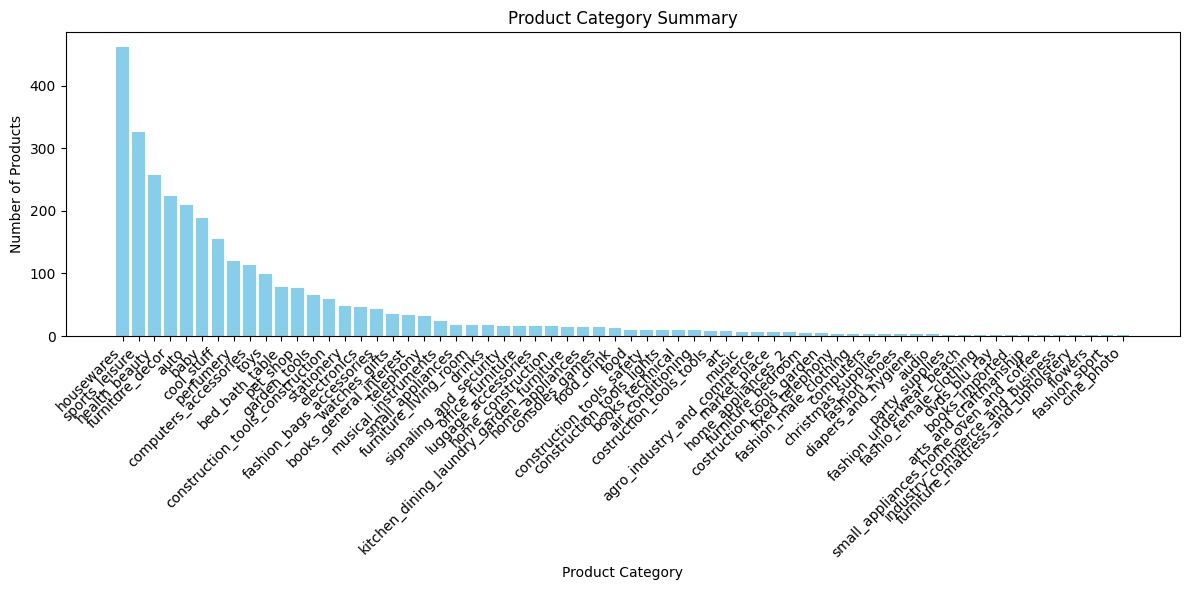

In [70]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named product_category_summary
# Replace this DataFrame with the one you obtained from your query
# product_category_summary = pd.read_sql_query(product_category_summary_query, conn)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(product_category_summary['Category'], product_category_summary['NumberOfProducts'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.title('Product Category Summary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

### Datamart/View 3: Order Status Summary

In [76]:
# Connect to an SQLite database named "Supermarket_olist" (this will create a new database file if it doesn't exist)
conn = sqlite3.connect('Supermarket_olist.db')
# Create the view
create_view_query = '''
DROP VIEW IF EXISTS OrderStatusSummary;
CREATE VIEW OrderStatusSummary AS
SELECT
    OrderStatus,
    COUNT(DISTINCT Orders) AS TotalOrders
FROM ProductInfo
GROUP BY OrderStatus;
'''

conn.executescript(create_view_query)

# Select from the view
order_status_summary_query = 'SELECT * FROM OrderStatusSummary'
order_status_summary = pd.read_sql_query(order_status_summary_query, conn)
order_status_summary

,OrderStatus,TotalOrders
0,approved,1
1,canceled,75
2,delivered,2805
3,invoiced,22
4,processing,80
5,shipped,28
6,unavailable,3


In [80]:
import plotly.express as px
# Plotting using Plotly Express
fig = px.bar(order_status_summary, x='OrderStatus', y='TotalOrders',
             title='Total Orders per Order Status',
             labels={'OrderStatus': 'Order Status', 'TotalOrders': 'Total Orders'})

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)


# Show the plot
fig.show()

### Datamart/View 4: Orders By Payment Type

In [84]:
# Connect to an SQLite database named "Supermarket_olist" (this will create a new database file if it doesn't exist)
conn = sqlite3.connect('Supermarket_olist.db')

# Create a cursor
cursor = conn.cursor()

# Assuming the payments table has columns: order_id, payment_type, payment_value
# Assuming the orders table has columns: order_id, order_status, order_purchase_timestamp

# Execute the SQL query using executescript
create_view_query = '''
    -- Datamart 4: Orders By Payment Type
    -- Explanation: This view provides a summary of the number of orders per payment type.
    -- Drop the view if it exists
    DROP VIEW IF EXISTS OrdersByPaymentType;

    -- Create the view
    CREATE VIEW OrdersByPaymentType AS
    SELECT
        Payment_Type,
        COUNT(DISTINCT Orders) AS NumberOfOrders
    FROM ProductInfo
    WHERE Payment_Type IS NOT NULL
    GROUP BY Payment_Type;
'''

# Use executescript instead of execute
conn.executescript(create_view_query)

# Commit the changes to the database
conn.commit()

# Read the result into a DataFrame
result = pd.read_sql_query('SELECT * FROM OrdersByPaymentType', conn)
result

,Payment_Type,NumberOfOrders
0,BOLETO,564
1,CREDIT_CARD,2322
2,DEBIT_CARD,49
3,VOUCHER,79


In [85]:
import plotly.express as px

# Assuming result is the DataFrame obtained from your query
fig = px.pie(result, names='Payment_Type', values='NumberOfOrders', title='Orders By Payment Type')

# Show the plot
fig.show()

### Datamart/View 5: Monthly Order Summary

In [92]:
# Connect to an SQLite database named "Supermarket_olist" (this will create a new database file if it doesn't exist)
conn = sqlite3.connect('Supermarket_olist.db')

# Assuming the payments table has columns: order_id, payment_type, payment_value
# Assuming the orders table has columns: order_id, order_status, order_purchase_timestamp

# Execute the SQL query using executescript
create_view_query = '''
-- Datamart 5: Monthly Order Summary
-- This view provides a summary of total orders per year and month.
-- Drop the view if it exists
DROP VIEW IF EXISTS MonthlyOrderSummary;

-- Create the view
CREATE VIEW MonthlyOrderSummary AS
SELECT
    OrderYear,
    COUNT(DISTINCT Orders) AS TotalOrders,
    ROUND(SUM(Price + FreightValue),2) AS TotalRevenue,
    ROUND(AVG(Price + FreightValue),2) AS AverageOrderValue
FROM ProductInfo
GROUP BY OrderYear
ORDER BY OrderYear DESC;
'''

# Use executescript instead of execute
conn.executescript(create_view_query)

# Commit the changes to the database
conn.commit()

# Read the result into a DataFrame
result = pd.read_sql_query('SELECT * FROM MonthlyOrderSummary', conn)
result

,OrderYear,TotalOrders,TotalRevenue,AverageOrderValue
0,2018,1807,358136.33,198.19
1,2017,1166,244628.05,209.80
2,2016,41,7616.69,185.77


In [101]:
import plotly.express as px

# Assuming 'result' is your DataFrame
fig = px.line(result, x='OrderYear', y=['TotalOrders', 'TotalRevenue'],
              title='Monthly Order Summary',
              labels={'OrderYear': 'Year', 'value': 'Value', 'variable': 'Metric'},
              line_shape='linear')

# Show the plot
fig.show()